<a href="https://colab.research.google.com/github/sahil-bhatia-iitbhu/deep_understanding_of_deep_learning/blob/main/03_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

1. Perceptron
2. Forward propagation - weights, activation, linear and non-linear functions
3. Loss, Cost and Loss Function
4. Backpropagation

### Regression

Loss Function - Mean Squared Error (MSE)

In [5]:
import numpy as np
import torch as t
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

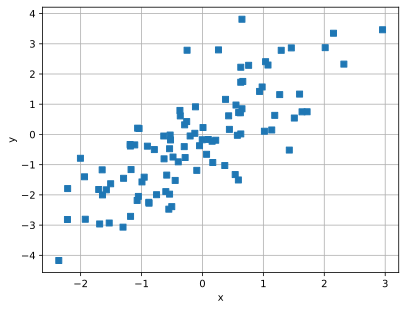

In [29]:
# create data

N = 100
x = t.randn(N, 1)
y = x + t.randn(N, 1)

# plot the pairs
plt.plot(x, y, 's')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [30]:
# build model

ANNreg = nn.Sequential(
    nn.Linear(1, 1, bias=True),  # input layer
    nn.ReLU(),                   # activation function
    nn.Linear(1, 1, bias=True)    # output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [31]:
# learning rate
learningRate = 0.01

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavour of gradient descent to be implemented)
optimizer = t.optim.SGD(ANNreg.parameters(), lr=learningRate)

In [35]:
# train the model
numepoch = 1000
losses = t.zeros(numepoch)

for epochi in range(numepoch):

  # forward pass
  y_pred = ANNreg(x)

  # compute loss
  loss = lossfun(y_pred, y)
  losses[epochi] = loss

  # backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

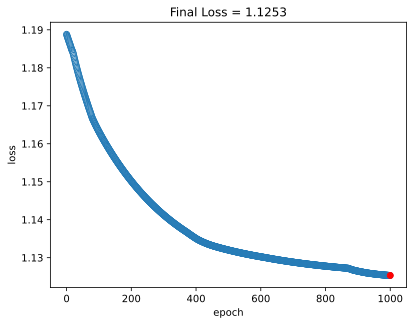

In [36]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=1)
plt.plot(numepoch, testloss.detach(), 'ro')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Final Loss = %g'%testloss.item())
plt.show()

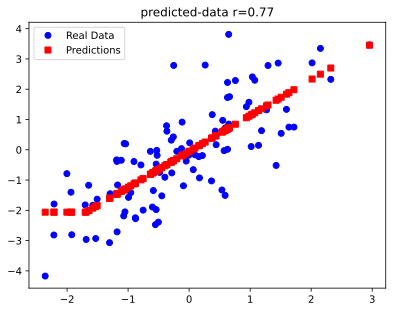

In [37]:
# plot the data

plt.plot(x,y,'bo',label='Real Data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f"predicted-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}")
plt.legend()
plt.show()